This text describes a data analysis project aimed at guiding Bellabeat's marketing strategy. The goal is to use smart device data to find key insights. The process involves a clear, five-step approach:

Ask: Define the main business problem and the questions to be answered.
Prepare: Examine the dataset to understand its context and quality.
Process: Clean and transform the data for analysis.
Analyze: Conduct an exploratory data analysis (EDA) to find patterns in user behavior.
Share: Summarize the findings and offer actionable marketing recommendations.

The ultimate purpose is to provide Bellabeat with a data-driven basis for making better marketing choices, with a special focus on understanding user activity, segmenting customers, and boosting engagement.

# Introduction

Bellabeat, a company that makes smart wellness devices for women, wants to better understand the people who use smart devices in general. By analyzing data from non-Bellabeat smart devices, they hope to find new opportunities and make smarter marketing decisions.

This analysis will look at user behavior patterns, including physical activity, sedentary habits, and how people engage with different features. The insights from this study will help Bellabeat's marketing team to:

- Target the right customers.
- Improve promotional strategies to increase user engagement.
- Guide product development with real-world usage data.

# ASK

The right questions is importatnt to ensure the analysis staying aligned with business needs. The general view with problem statements, which pave a direction and goals of the analysis, is defined.

The key is defined as follow:
1. What:
    - Problem: Understand general consumer wellness habits as captured by smart device data to identify growth opportunities and refine product strategy.
    - Goal: Extract actionable insights from analyzed consumer patterns to inform marketing strategy and potential product enhancements, which driving user acquisitions and engagement for Bellabeat and support Bellabeat's ambition to become a larger player in the global smart device market.
2. Who:
    - Who is the stake holder: Urška Sršen (CCO), Sando Mur (key member), marketing team.
    - Who is the target: women customer in smart device market.
3. When:
    - The data is collected between March 12, 2016 - May 12, 2016. This period is several year old.
4. Where:
    - Data source: publicly available "FitBit Fitness Tracker Data" from Kaggle.
    - Geographic Context: unknown, it is considered as applying insights to global market.
5. How:
    - Data Acquisition & Cleaning: Source and preparing the selected FitBit dataset for analysis.
    - EDA: Performing descriptive statistic to understand the distribution and summary of key metrics (activity, sleep, stes, calories, etc.)
    - Pattern Identification: Understand trends, correlation between health metrics, and common behavioral patterns.
    - Segmentation: Segmenting users based on their activity or sleep pattern.
    - Visualization: Creating charts and dashboards to communicate complex findings.
    - Insight Generation & Recommendation: Translate data-driven insight into practical, actionable reccommendation specifically for Bellabeat's ambition, attract and retain their target audience.
6. Why:
    - Gain a Competitive Edge: Understand broader market trends and user preferences beyond their current customer base, identifying what drives engagement in the smart health sector.
    - Unlock New Growth Opportunities: Pinpoint untapped market segments, potential feature gaps, or areas for product innovation that resonate with prevalent consumer habits.
    - Optimize Marketing & Product Strategy: Align Bellabeat's outreach, messaging, and app features more precisely with proven user behaviors and preferences, thereby increasing the effectiveness of marketing campaigns and the value proposition of the Bellabeat app.
    - Inform Data-Driven Decisions: Provide key stakeholders with the necessary insights to make informed strategic decisions regarding product development, marketing spend, and overall market expansion, ensuring Bellabeat's offerings are relevant and highly appealing to health-conscious women

# PREPARE

## 1. Data Collection
The dataset is publicly available from Kaggle with licensed of CC0: Public Domain. This allows the data to be used for various purposes, even for commercial purposes without the permission of the author.

## 2. Data Understanding
Overview of dataset directory path:

In [ ]:
# --- Import heartrate_seconds_merged ---
heartRate1 = pd.read_csv(os.path.join(dir1, 'heartrate_seconds_merged.csv'))
heartRate2 = pd.read_csv(os.path.join(dir2, 'heartrate_seconds_merged.csv'))

heartRate1['datetime_full'] = pd.to_datetime(heartRate1['Time'], format='%m/%d/%Y %I:%M:%S %p')
heartRate1['Date'] = heartRate1['datetime_full'].dt.date
heartRate1['Time'] = heartRate1['datetime_full'].dt.time
heartRate1.drop(columns=['datetime_full'], inplace=True)
#print(heartRate1.columns.tolist())
new_columns = ['Id', 'Date','Time', 'Value']
heartRate1 = heartRate1.reindex(columns=new_columns)

heartRate2['datetime_full'] = pd.to_datetime(heartRate2['Time'], format='%m/%d/%Y %I:%M:%S %p')
heartRate2['Date'] = heartRate2['datetime_full'].dt.date
heartRate2['Time'] = heartRate2['datetime_full'].dt.time
heartRate2.drop(columns=['datetime_full'], inplace=True)
#print(heartRate1.columns.tolist())
new_columns = ['Id', 'Date','Time', 'Value']
heartRate2 = heartRate2.reindex(columns=new_columns)

display(heartRate1.head(10))
display(heartRate2.head(10))

In [ ]:
# --- Import minuteSleep_merged ---
minuteSleep1 = pd.read_csv(os.path.join(dir1, 'minuteSleep_merged.csv'))
minuteSleep2 = pd.read_csv(os.path.join(dir2, 'minuteSleep_merged.csv'))

minuteSleep1['datetime_full'] = pd.to_datetime(minuteSleep1['date'], format='%m/%d/%Y %I:%M:%S %p')
minuteSleep1['Date'] = minuteSleep1['datetime_full'].dt.date
minuteSleep1['Time'] = minuteSleep1['datetime_full'].dt.time
minuteSleep1.drop(columns=['date','datetime_full'], inplace=True)
#print(minuteSleep1.columns.tolist())
new_columns = ['Id', 'Date','Time', 'value', 'logId']
minuteSleep1 = minuteSleep1.reindex(columns=new_columns)

minuteSleep2['datetime_full'] = pd.to_datetime(minuteSleep2['date'], format='%m/%d/%Y %I:%M:%S %p')
minuteSleep2['Date'] = minuteSleep2['datetime_full'].dt.date
minuteSleep2['Time'] = minuteSleep2['datetime_full'].dt.time
minuteSleep2.drop(columns=['date','datetime_full'], inplace=True)
new_columns = ['Id', 'Date','Time', 'value', 'logId']
minuteSleep2 = minuteSleep2.reindex(columns=new_columns)

display(minuteSleep1)
display(minuteSleep2)

## 3. Initial Data Exploration
The datasets contains daily activity metrics which are recorded by a smart device. The metrics and their descriptions are as following:

A. In dailyActivity:
- Id:	Unique identifier for each user
- ActivityDate:	Date&Time when the activity was recorded
- TotalSteps:	Total number of steps taken by the user in a day
- TotalDistance:	Total distance covered in a day (combines both tracked and manually logged activities)
- TrackerDistance:	Distance automatically tracked by the device in kilometer (includes all activity levels)
- LoggedActivitiesDistance:	Distance manually entered by the user (in kilometer)
- VeryActiveDistance:	Distance covered during high-intensity (very active) activities
- ModeratelyActiveDistance:	Distance covered during moderate-intensity activities
- LightActiveDistance:	Distance covered during low-intensity (light active) activities
- SedentaryActiveDistance:	Distance recorded during sedentary state (usually very low or zero)
- VeryActiveMinutes:	Time spent in very active activities (in minutes)
- FairlyActiveMinutes:	Time spent in moderately active activities (in minutes)
- LightlyActiveMinutes:	Time spent in light activities (in minutes)
- SedentaryMinutes:	Time spent being sedentary (e.g., sitting or lying down)
- Calories:	Total calories burned in a day

B. In heartRate:
- Id:	Unique identifier for each user
- Time:	Date&Time when the activity was recorded
- Value: Value of recorded heart rate

C. In minuteSleep:
- Id:	Unique identifier for each user
- Date:	Date&Time when the activity was recorded
- Value: Sleep stage according to the manual of the device
- LogId: Unique identifier for each specific sleep session

## 4. Data Assessment & Cleaning
4.1. Missing values
    - If the records is missing, additional data should be collected to ensure the sample was representative.
    - If the missing can't be collected, data in the same column should be considered to adjust and fill the missing (mean, median, mode, or a specific value of 0).
    - If nothing can be done, business objective should be reconsidered to align the data.
4.2. Duplicate records
    - If the dupplicate records are found, remove the duplicate rows, which could lead to the overpresentation of data points.
4.3. Incorrect Data Types
    - If a data types is error, it should be converted into the correct data type.
4.4. Inconsistent Data Entry
    - If the incorrect is found, they should be corrected if possible (e.g., formatting issues, unrealistic values)
    - If the incorrect can't be fixed, they should be noted or even excluded from the dataset. But ensure the remaining dataset still meet the sample size requirements for analysis.
4.5. Column Name Issues
    - If the column name is hard to understand, it should be considered to be rename for clarity and consistency.
4.6. Outlier
    - As extreme value can heavily skew average, standard deviations, and statistical model, it can be a result of entry mistake. If the extreme value is found, it should be investigated further, or eliminated before the analysis.

In [ ]:
# Display the data types of each column
print("\nSummary statistics of the DataFrame:")
display(df.describe().transpose())
# Display summary statistics of the DataFrame
print("\nMissing values in each column:")
display(df.isnull().sum())

Data Context & Sampling
Link: https://www.demandsage.com/smartwatch-statistics/

The representative of the dataset should be considered before analysis. As Bellabeat's products are aimed to sell globally, the relevant customer should be included in the smartwatch users worldwide.

According to Demandsage, there are 562.86 million smartwatch users globally in 2025, and 40% of them is women, around 225.14 million female users.

With that population, the smallest sample size, which should be enough to make analysis confidently with a 95% confidence level and a 5% margin of error, is 385 samples. It's far larger than the current sample size, 35 users, with a 44.59% confidence level (estimated a 5% margin of error). This sample size of 35 users is not sufficient to respresent the population, which should be noted during interpreting results.

To improve the sample size and enrich the insight quality, the sample size must be increased to sufficient level. It can be done by asking for data from the provider, but it requires authorization, statement of intended use, and organization representation.

The analysis will be proceed with the available dataset as it's sufficient for the primary objective in this case - to practice data analysis in the real-world case.

# PROCESS

In this stage, the raw dataset are cleaned first, then grouped together to have a general view of the whole information.

3 groups of dataset are defined in this stage:
- Daily Activity
- Heart Rate
- Sleep Minute

## 1. Daily Activity Data Cleaning

In [ ]:
print("\nChecking for missing values:")
print("-------------------------------------------")
display(check_missing_values(df))

print("\nChecking for duplication values:")
print("-------------------------------------------")
display(check_duplicates(df))

print("\nChecking DataFrame information:")
print("-------------------------------------------")
check_information(df)

In [ ]:
df['ActivityDate'] =  pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
display(df.info())
display(df.describe().transpose())

## 2.Heart Rate Data Cleaning

In [ ]:
heartRate = pd.concat([heartRate1, heartRate2], ignore_index=True)
print("\nChecking for missing values:")
print("-------------------------------------------")
display(check_missing_values(heartRate))

print("\nChecking for duplication values:")
print("-------------------------------------------")
display(check_duplicates(heartRate))

print("\nDisplaying duplicates in heartRate DataFrame:")
print("-------------------------------------------")
display(display_duplicates(heartRate))

print("\nChecking DataFrame information:")
print("-------------------------------------------")
check_information(heartRate)

In [ ]:
heartRate.drop_duplicates(inplace=True)

In [ ]:
heartRate['Date'] =  pd.to_datetime(heartRate['Date'], format='%m/%d/%Y')
display(heartRate.info())

After checking the specific zone of duplication, I found no duplicates.

## 3.Sleep Data Cleaning

In [ ]:
???

In [ ]:
minuteSleep = pd.concat([minuteSleep1, minuteSleep2], ignore_index=True)

print("\nChecking for missing values:")
print("-------------------------------------------")
display(check_missing_values(minuteSleep))

print("\nChecking for duplication values:")
print("-------------------------------------------")
display(check_duplicates(minuteSleep))

print("\nDisplaying duplicates in minuteSleep DataFrame:")
print("-------------------------------------------")
display(display_duplicates(minuteSleep))

print("\nChecking DataFrame information:")
print("-------------------------------------------")
check_information(minuteSleep)

In [ ]:
minuteSleep.drop_duplicates(inplace=True)

In [ ]:
minuteSleep['Date'] =  pd.to_datetime(minuteSleep['Date'], format='%m/%d/%Y')
display(minuteSleep.info())

In [ ]:
# --- Aggregate heartRate_merged ---
## Why choose the gap of 15 seconds?
heartRate['Seconds'] = pd.to_timedelta(heartRate['Time'].astype(str)).dt.total_seconds()
display(heartRate.head(10))

In [ ]:
heartRate['TimeDiff'] = heartRate.groupby(['Id','Date'])['Seconds'].diff()

In [ ]:
print(heartRate.describe().transpose())

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=heartRate, x='TimeDiff', kde=True)

# Set the title and labels
plt.title('Distribution of Time Differences', fontsize=16)
plt.xlabel('Time Difference (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.ylim(0, 2100000)  # Adjust y-axis limit for better visibility
plt.show()

most_common_time_diff = heartRate['TimeDiff'].mode()
print(f"Most common time difference: {most_common_time_diff}")
display(most_common_time_diff)
time_diff_counts = heartRate['TimeDiff'].value_counts()
print(f"\nCounts of each time difference:\n{time_diff_counts}")
display(time_diff_counts)

In [ ]:
display(heartRate.head(10))
wear_tracking_agg = heartRate.groupby(['Id', 'Date']).apply(
    lambda x: x.loc[x['TimeDiff'] <= 15, 'TimeDiff'].sum(),
    include_groups=False
).reset_index(name = 'Total Wear Time (Seconds)')

wear_tracking_agg['Total Wear Time (Minutes)'] = wear_tracking_agg['Total Wear Time (Seconds)'] / 60
wear_tracking_agg['Total Wear Time (Hours)'] = pd.to_timedelta(wear_tracking_agg['Total Wear Time (Seconds)'], unit='s').apply(lambda x: str(x).split()[-1])
print("\nAggregated wear tracking DataFrame:")
print("-------------------------------------------")
display(wear_tracking_agg.head())

In [ ]:
# --- Aggregate heartRate_merged ---
heartRate_agg = heartRate.groupby(['Id', 'Date']).agg(
    min_heart_rate=('Value', 'min'),
    max_heart_rate=('Value', 'max'),
    mean_heart_rate=('Value', 'mean'),
).reset_index()

print("\nAggregated heartRate DataFrame:")
print("-------------------------------------------")
display(heartRate_agg)

check_duplicates(heartRate_agg)

In [ ]:
# --- Aggregate minuteSleep_merged ---
minuteSleep_agg = minuteSleep.groupby(['Id','Date']).agg(
    Sleep_from_time = ('Time','min'),
    Sleep_to_time = ('Time','max'),
    total_sleep = ('value','count'),
    logId = ('logId','first'),
    Minutes_Asleep = ('value', lambda x: (x == 1).sum()),
    Minutes_Restless = ('value', lambda x: (x == 2).sum()),
    Minutes_Awake = ('value', lambda x: (x == 3).sum())
).reset_index()

display(minuteSleep_agg)

# Combine the two aggregated DataFrames
display(minuteSleep_agg.info())

check_duplicates(minuteSleep_agg)

In [ ]:
print("\nDisplaying the first 5 rows of each DataFrame:")
print("-------------------------------------------")
print("Daily Activity DataFrame:")
display(df.head(5))
print("\nMinute Sleep Aggregated DataFrame:")
display(minuteSleep_agg.head(5))
print("\nHeart Rate Aggregated DataFrame:")
display(heartRate_agg.head(5))
print("\nWear Tracking Aggregated DataFrame:")
display(wear_tracking_agg.head(5))

In [ ]:
merge1 = pd.merge(df, minuteSleep_agg, left_on=['Id', 'ActivityDate'], right_on=['Id', 'Date'], how='left')
merge2 = pd.merge(merge1, heartRate_agg, left_on=['Id', 'ActivityDate'], right_on=['Id', 'Date'], how='left')
df_merge = pd.merge(merge2, wear_tracking_agg, left_on=['Id', 'ActivityDate'], right_on=['Id', 'Date'], how='left')
df_merge.drop(columns=['Date_x', 'Date_y','Date'], inplace=True)
print("\nMerged DataFrame:")
print("-------------------------------------------")
check_information(df_merge)

print("Checking for missing values in the merged DataFrame:")
print("-------------------------------------------")
display(check_missing_values(df_merge))

print("Checking for duplication values in the merged DataFrame:")
print("-------------------------------------------")
print(check_duplicates(df_merge))

In [ ]:
# Check for missing values in the merged DataFrame
print("\nMissing values of sleep records in the merged DataFrame:")
missing_sleep_records = df_merge['logId'].isnull().sum()
print(f"Number of missing sleep records: {missing_sleep_records}")
missing_heart_rate_records = df_merge['min_heart_rate'].isnull().sum()
print(f"Number of missing heart rate records: {missing_heart_rate_records}")
missing_wear_tracking_records = df_merge['Total Wear Time (Seconds)'].isnull().sum()
print(f"Number of missing wear tracking records: {missing_wear_tracking_records}")
total_records = df_merge.shape[0]
print(f"Total records in the merged DataFrame: {total_records}")

data = {
    'Total records': total_records,
    'Missing sleep records': missing_sleep_records,
    'Missing heart rate records': missing_heart_rate_records,
    'Missing wear tracking records': missing_wear_tracking_records
}
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

missing_records = pd.DataFrame(data.items(), columns=['Columns', 'Count']).reset_index(drop=True)
missing_records['Percentage'] = (missing_records['Count'] / total_records) * 100
display(missing_records)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data = missing_records, x ='Columns', y='Count', ax=ax, palette=colors)
for index, row in missing_records.iterrows():
    ax.text(
        index,
        row['Count'] + 5,
        f"{row['Count']}"+f" ({row['Percentage']:.2f}%)",
        color='black',
        ha='center',
        va='bottom',
        fontsize=12
    )
ax.set_title('Missing Records in Merged DataFrame', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Record Type', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
#df_merge.to_csv('df_merge.csv', index=False)
#print("\nMerged DataFrame saved to 'df_merge.csv'.")

display(df_merge['TotalSteps'].sort_values(ascending=True))

# ANALYSIS

In this stage, the analysis is conducted by applying data analysis and data visualization through Tableau.



## Activity Level
According to Tudor-Locke C, Bassett DR Jr. (2004), the categories of activity level is defined as follows:
- Sedentary: Less than 5,000 steps per day.
- Low Active: Between 5,000 and 7,499 steps per day.
- Somewhat Active: Between 7,500 and 9,999 steps per day.
- Active: 10,000 or more steps per day.
- Highly Active: 12,500 or more steps per day.

However, in this analysis, the thresholds are refined as follows to make it simplier and more focused.
- Sedentary: Less than 5,000 steps per day.
- Moderate Active: Between 5,000 and 9,999 steps per day.
- Active: 10,000 or more steps per day.
- Athlete: 12,500 or more steps per day.

References: 
- Tudor-Locke, C., & Bassett Jr., D. R. (2004). How many steps/days are enough: Preliminary pedometer indices for public health. Sports Medicine, 34, 1-8. doi:10.2165/00007256-200434010-00001

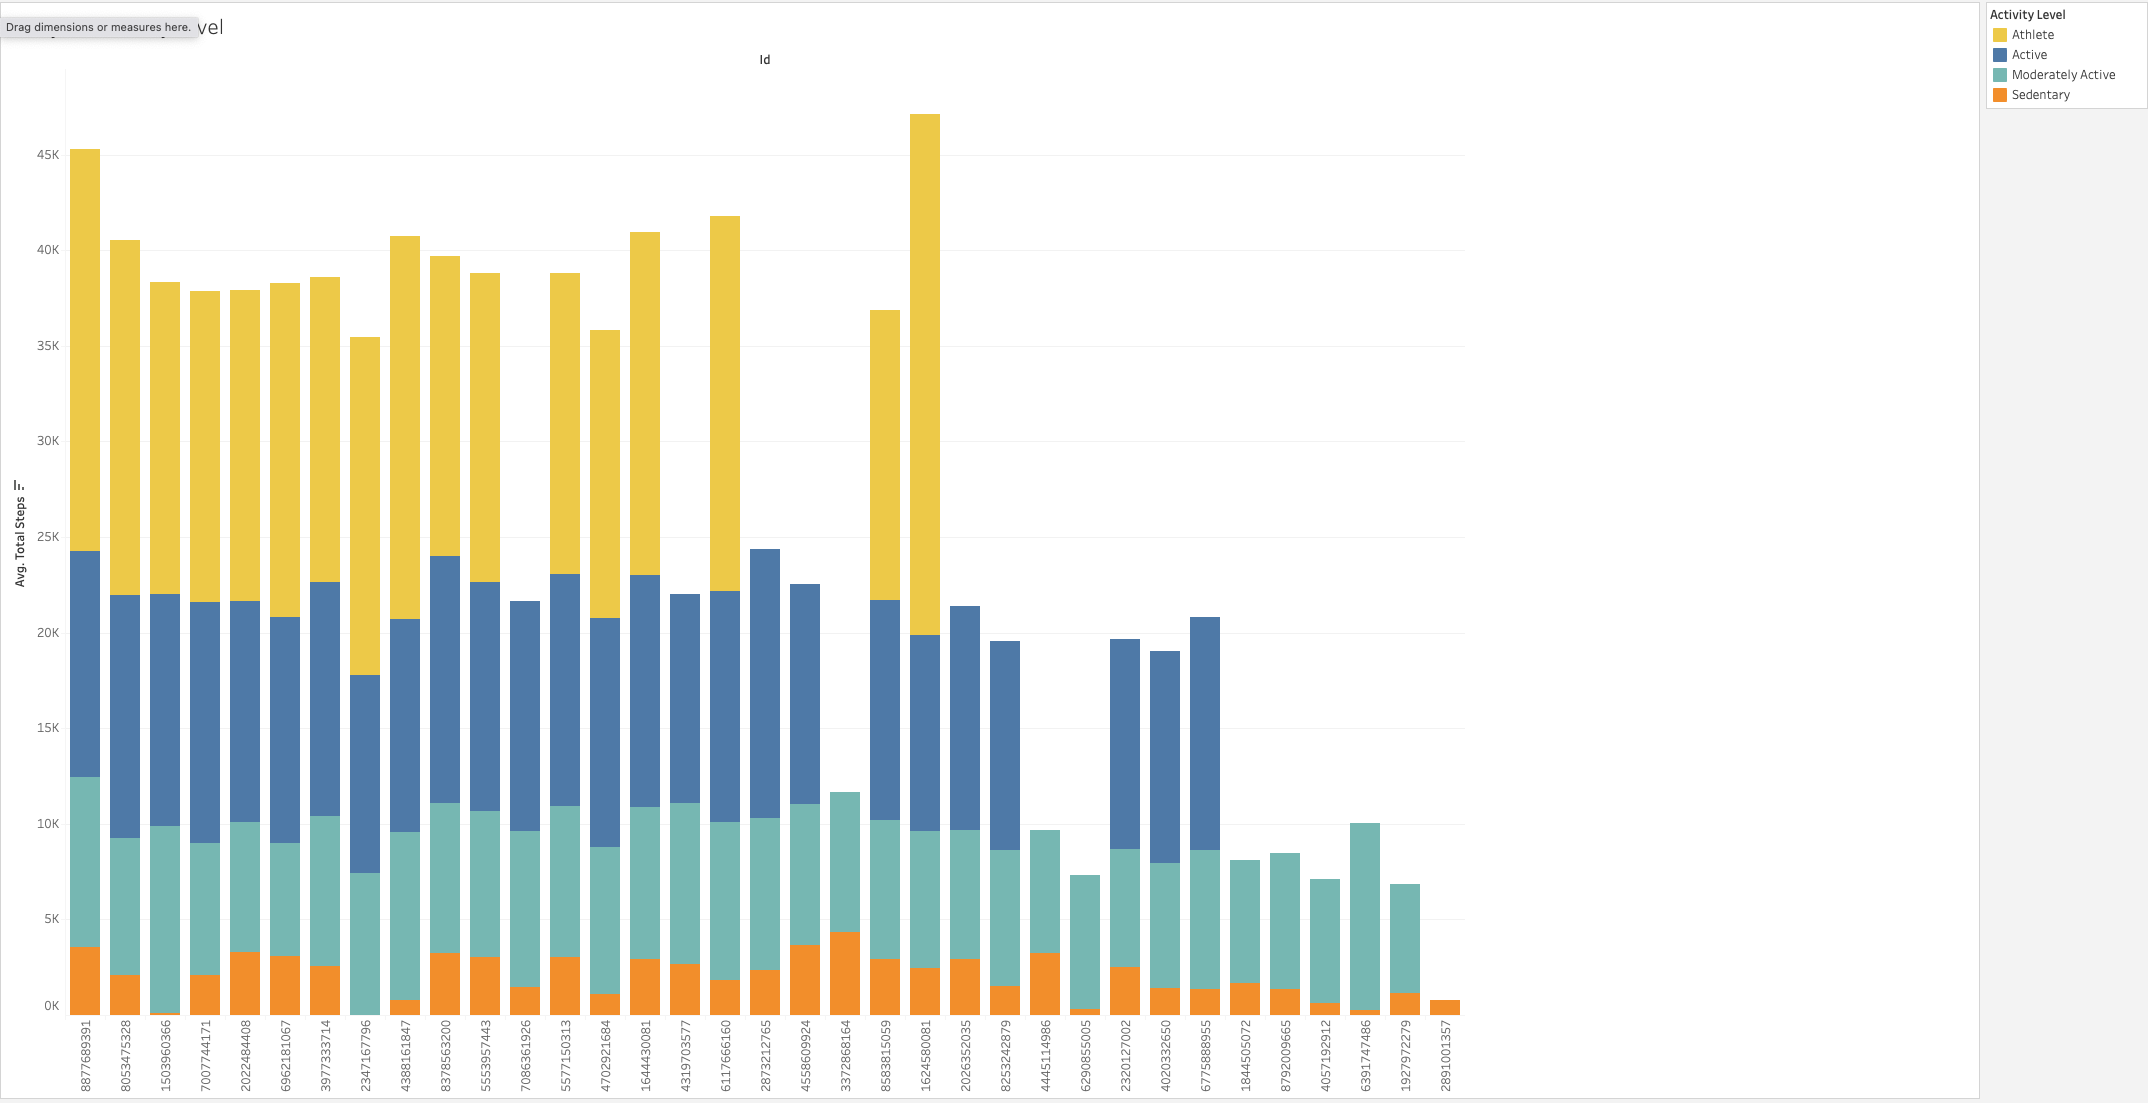

We found the users are in a wide range from Sedentary to Athlete, and most of them are at least Active level.

## Daily Sleep Quality
A value of retest reliability of 0.85 for global scale was defined to distinguish the Sleep Efficiency.

In this analysis, the threshold of 0.85 is defined as follow:
- Greater than and equal to 0.85 : High sleep quality
- Lower than : Low sleep quality

References: 
- Sathyanarayana, Aarti & Joty, Shafiq & Fernandez-Luque, Luis & Ofli, Ferda & Srivastava, Jaideep & Elmagarmid, Ahmed & Arora, Teresa & Taheri, Shahrad. (2016). Sleep Quality Prediction From Wearable Data Using Deep Learning. JMIR mHealth and uHealth. 4. 10.2196/mhealth.6562.
- Brindle, R. C., Yu, L., Buysse, D. J., & Hall, M. H. (2019). Empirical derivation of cutoff values for the sleep health metric and its relationship to cardiometabolic morbidity: results from the Midlife in the United States (MIDUS) study. Sleep, 42(9), zsz116. https://doi.org/10.1093/sleep/zsz116

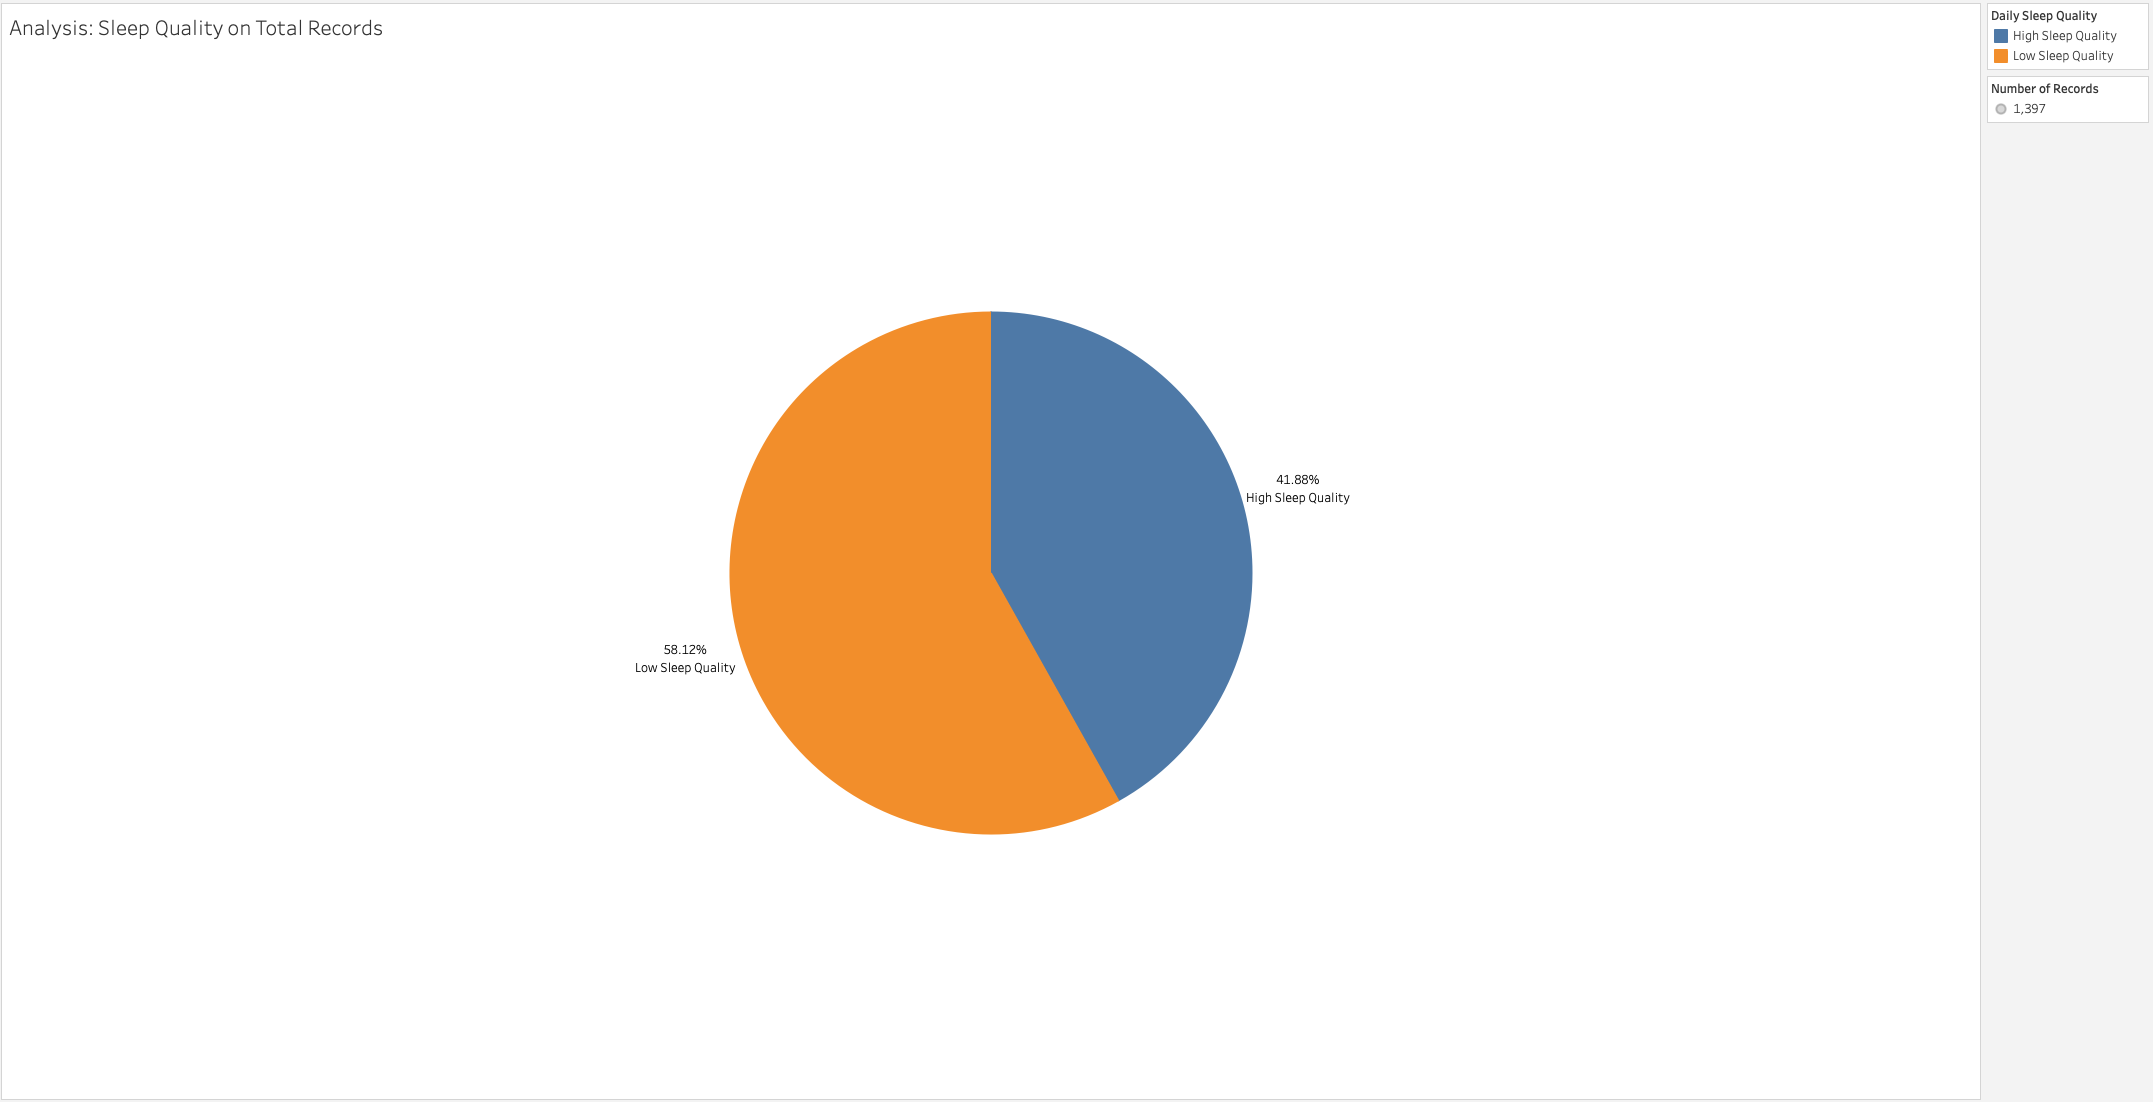
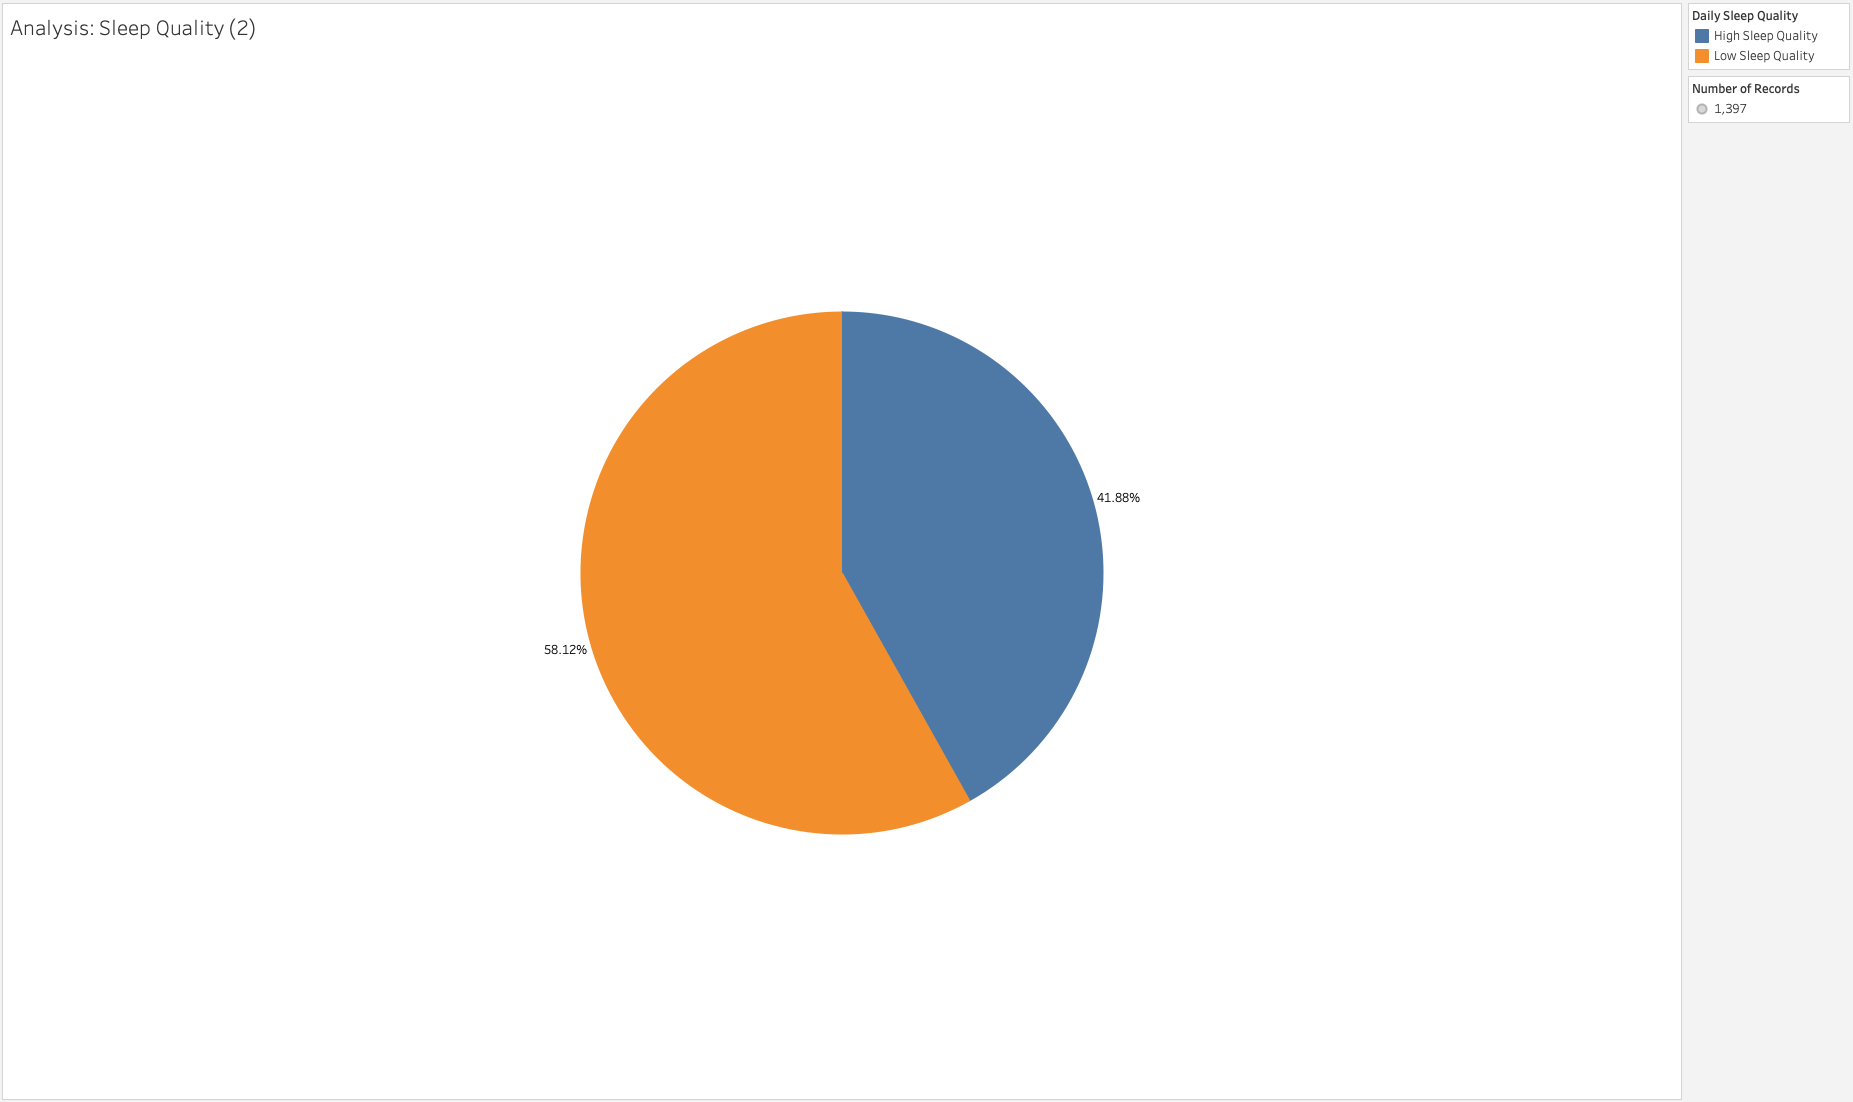

According to the defined threshold, we found 41.88% are High Sleep Quality and 58.12% are Low Sleep Quality on Total Number of Records. However, as looking carefully in the records, which is not null in the dataset, the most are those with High Sleep Quality (with 90.56% of available records). It's much higher than the Low Slee Quality (with 9.44% of available records).

# Share: Insights

## Insight 1: User Activity Segment
1/ In the general, those with activity would have better sleep comparing to those with none. It's clear to recognize the impact of activity on sleep in the range over 10.000 steps.
2/ Most of the records are in Sendentary zone, which means most of user behaviours are casual and that they don't always stick to the exercise and activities.
3/ The "NO SLEEP RECORD" are spreading over the ranges of steps, which mean these users are still not familiar with the Sleep Tracking features.

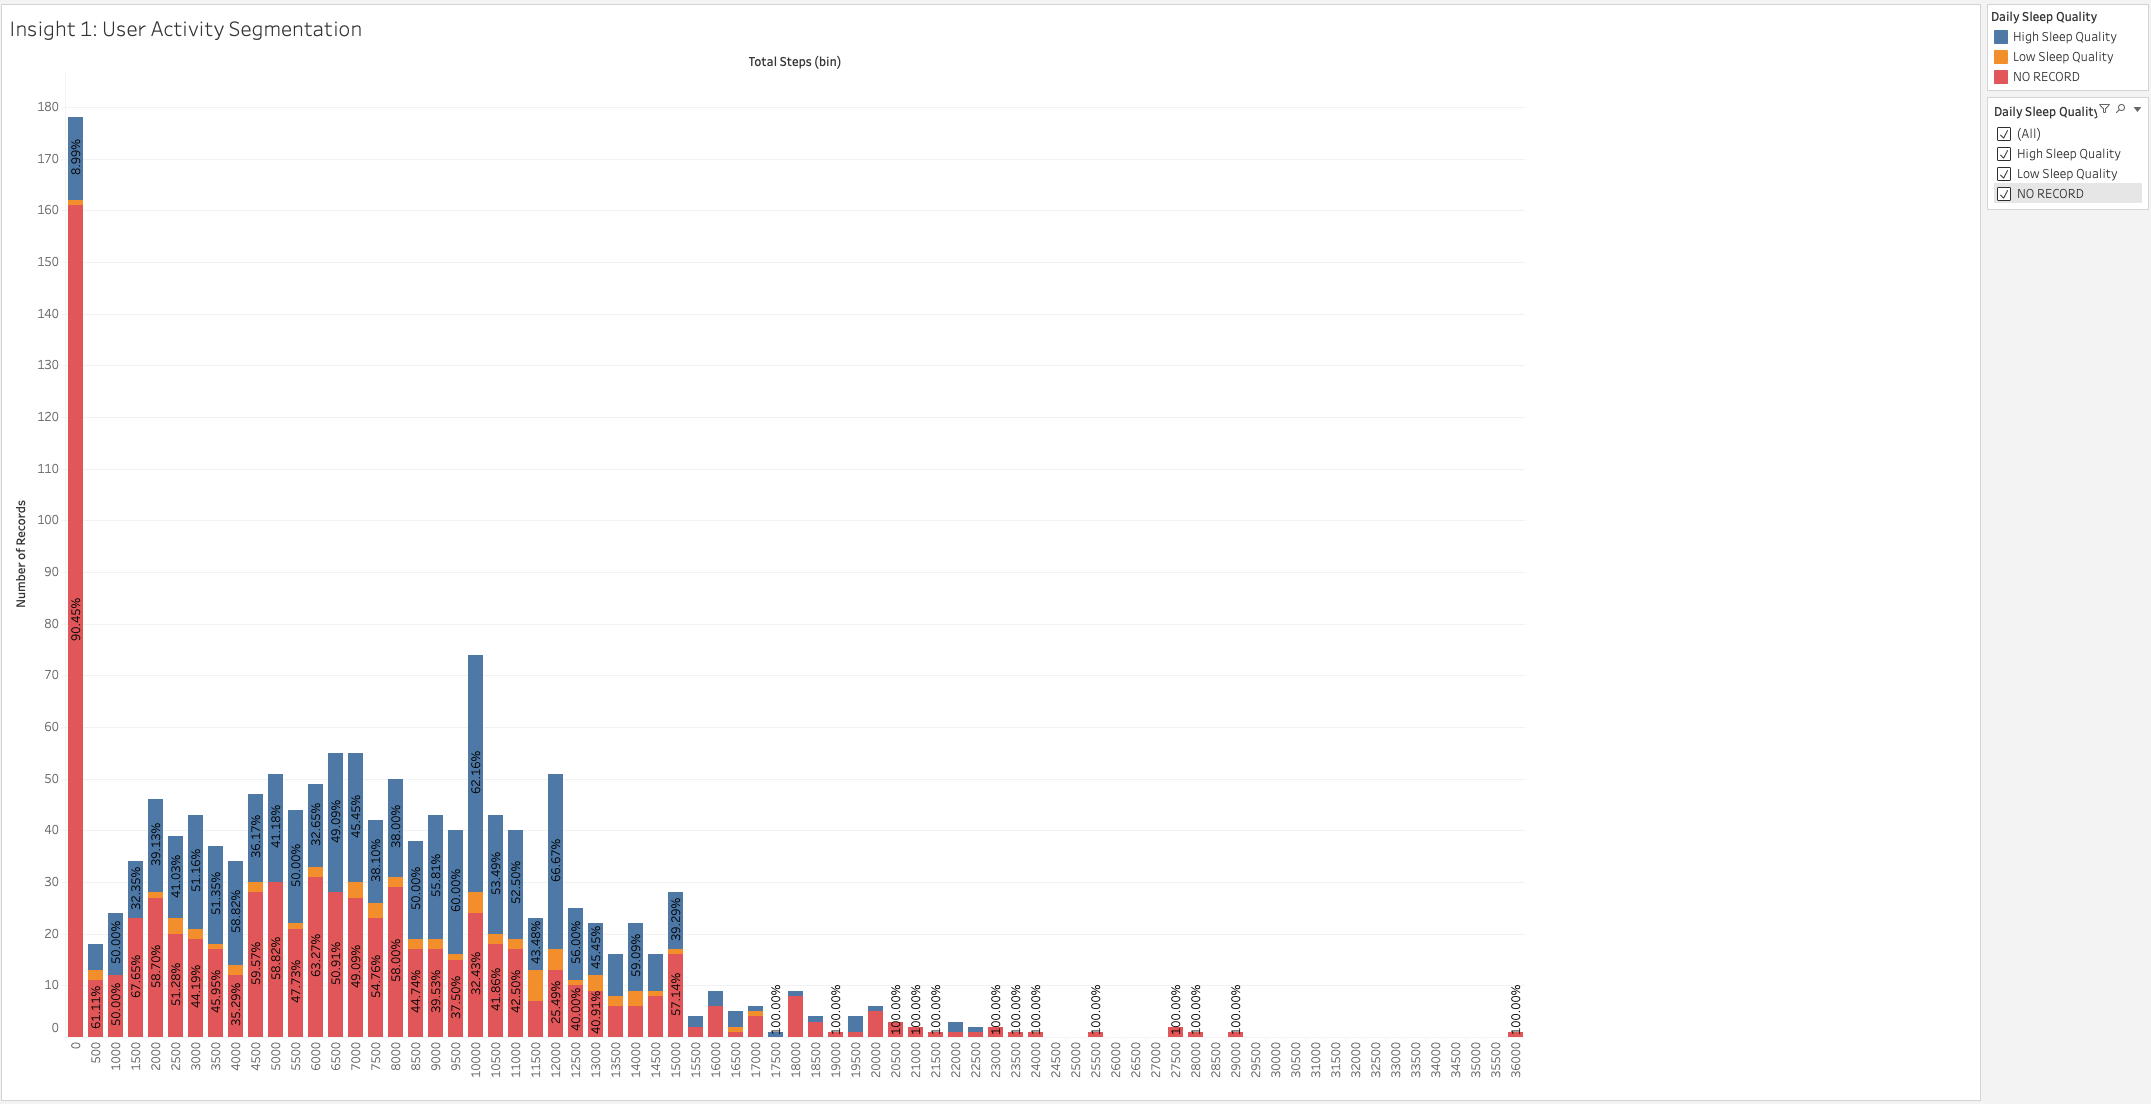
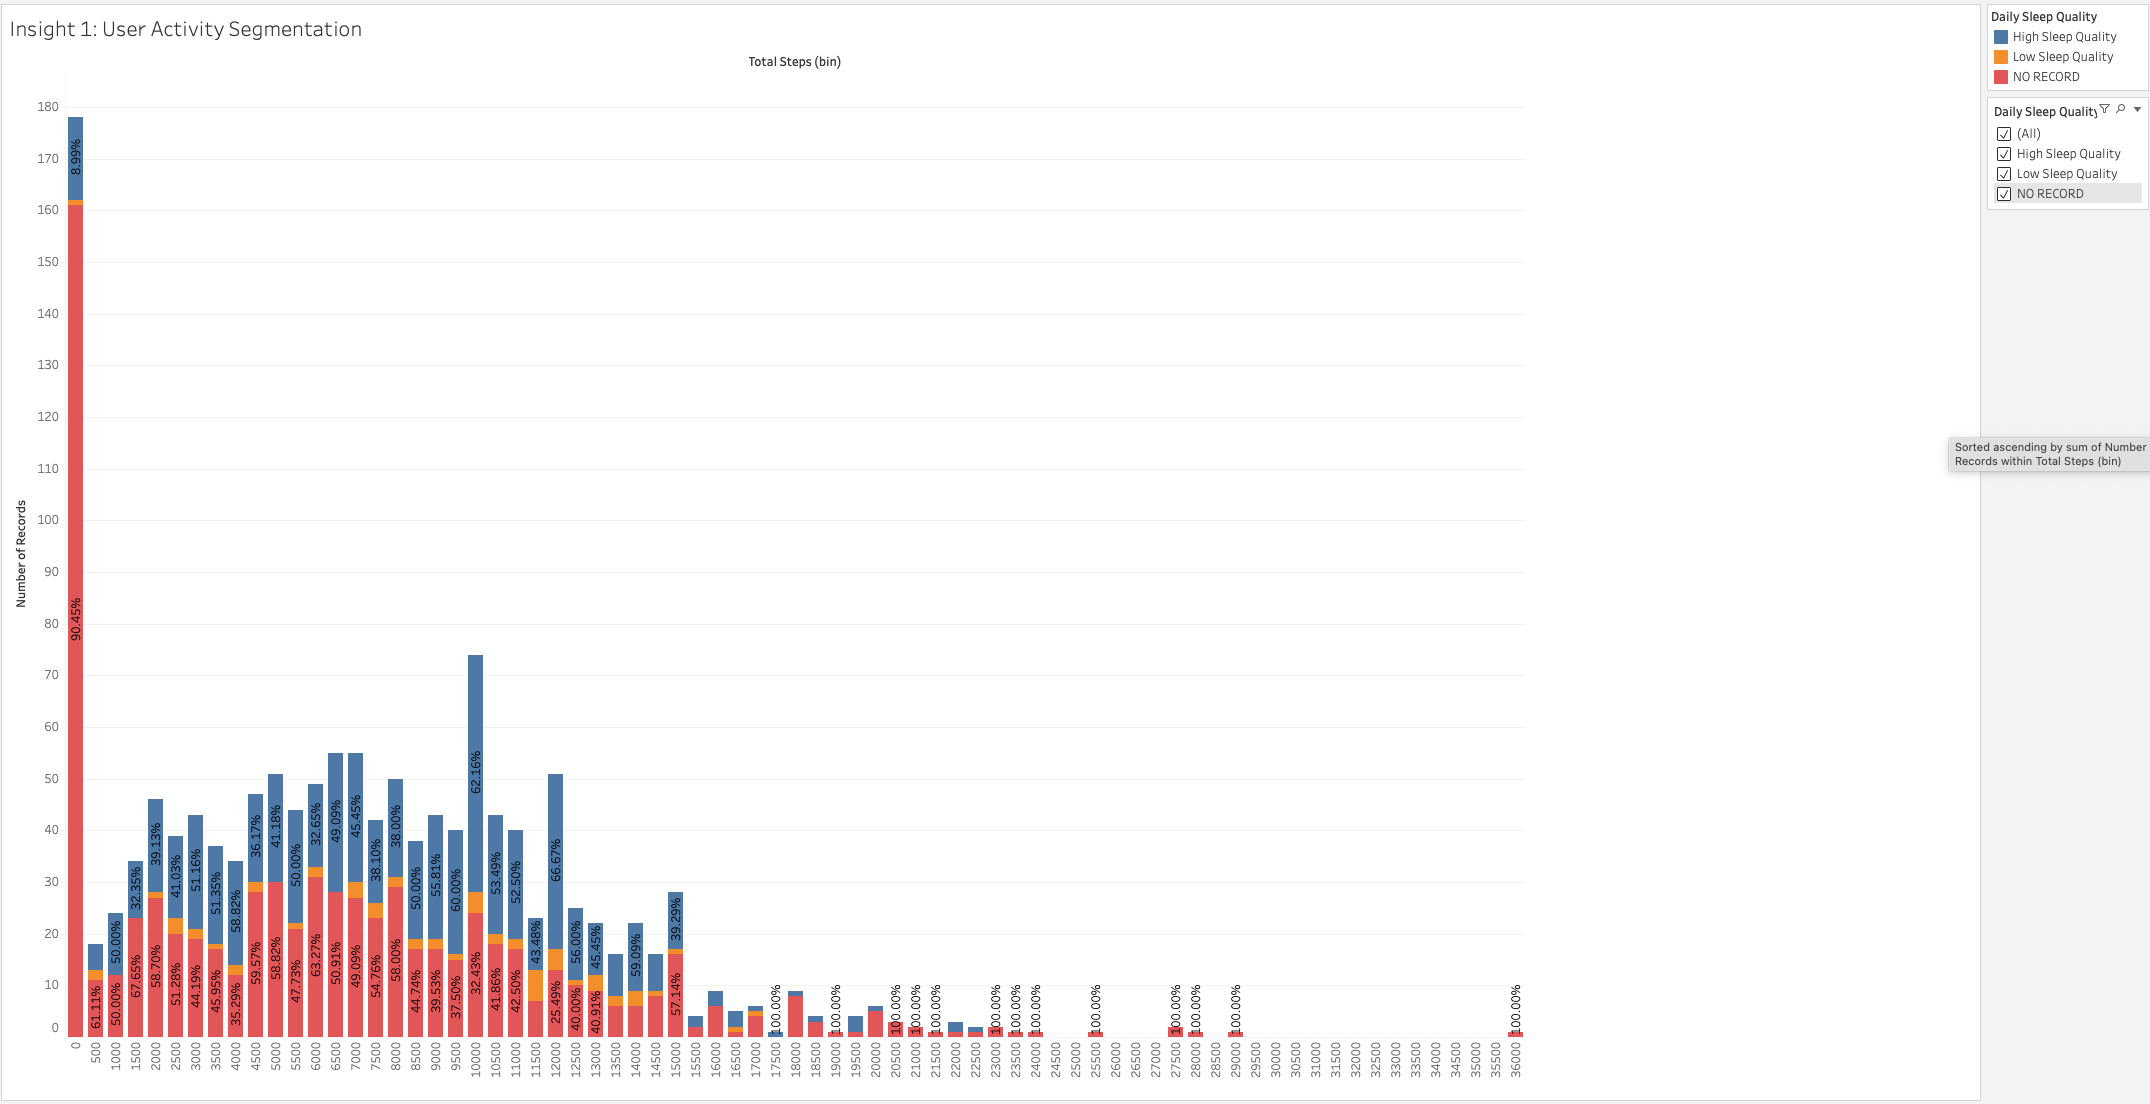

## Insight 2: Sleep Feature Engagement

But those, who have high sleep quality, are mostly in proactive in activity level.
However, there is a case, ID "3977333714", who has clearly poor sleep quality, even though working hard in the records.
This is potential analysis as we should analyze about this user.

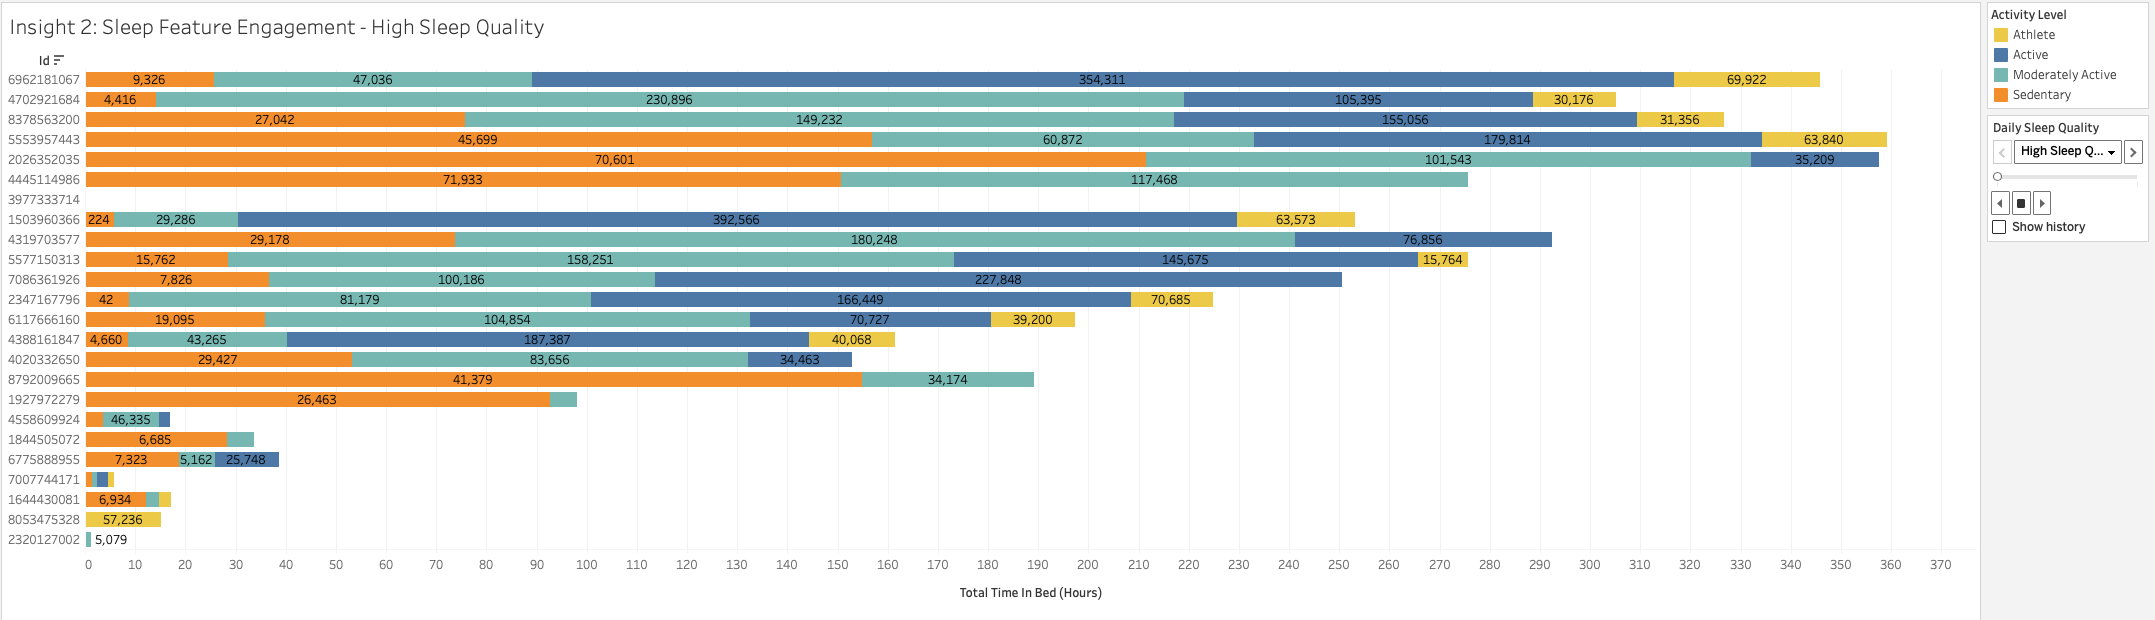

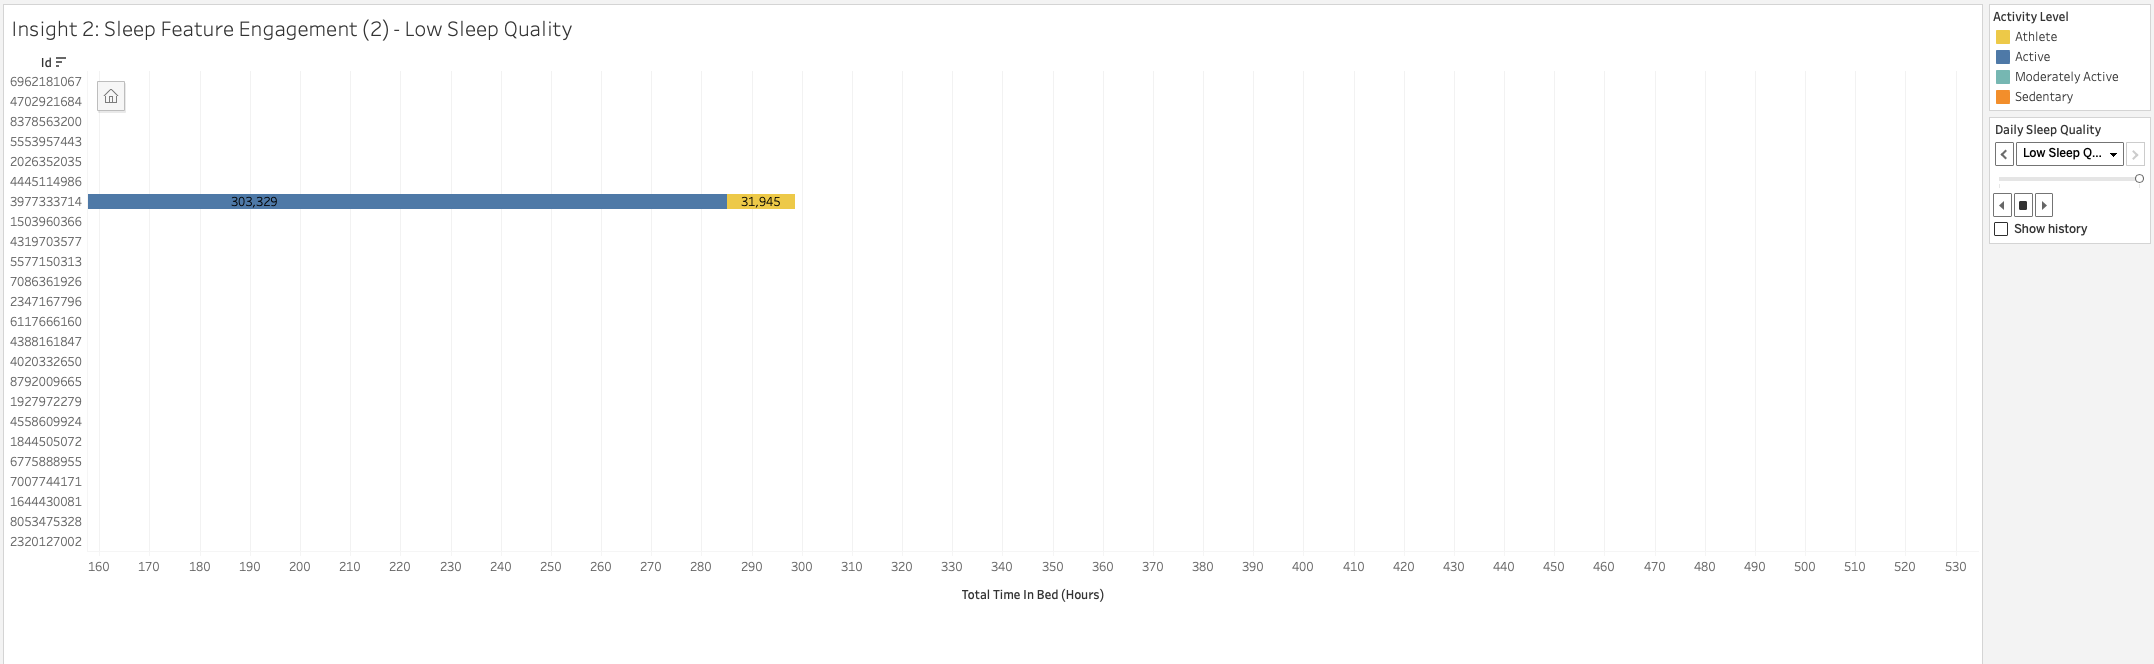

## Insight 3: Sleep Efficiency
In this chart, there are 3 specific users who should be focus on. 
- ID "3977333714", who was mentioned in insight 2, is the one with full of low sleep quality. This should be a case study to understand more about the user behaviour and sleep efficiency.
- There are 8 users who has full high slee quality. We should analyze these two users to understand what drives their good performance, and use those insights to help other users improve their sleep.

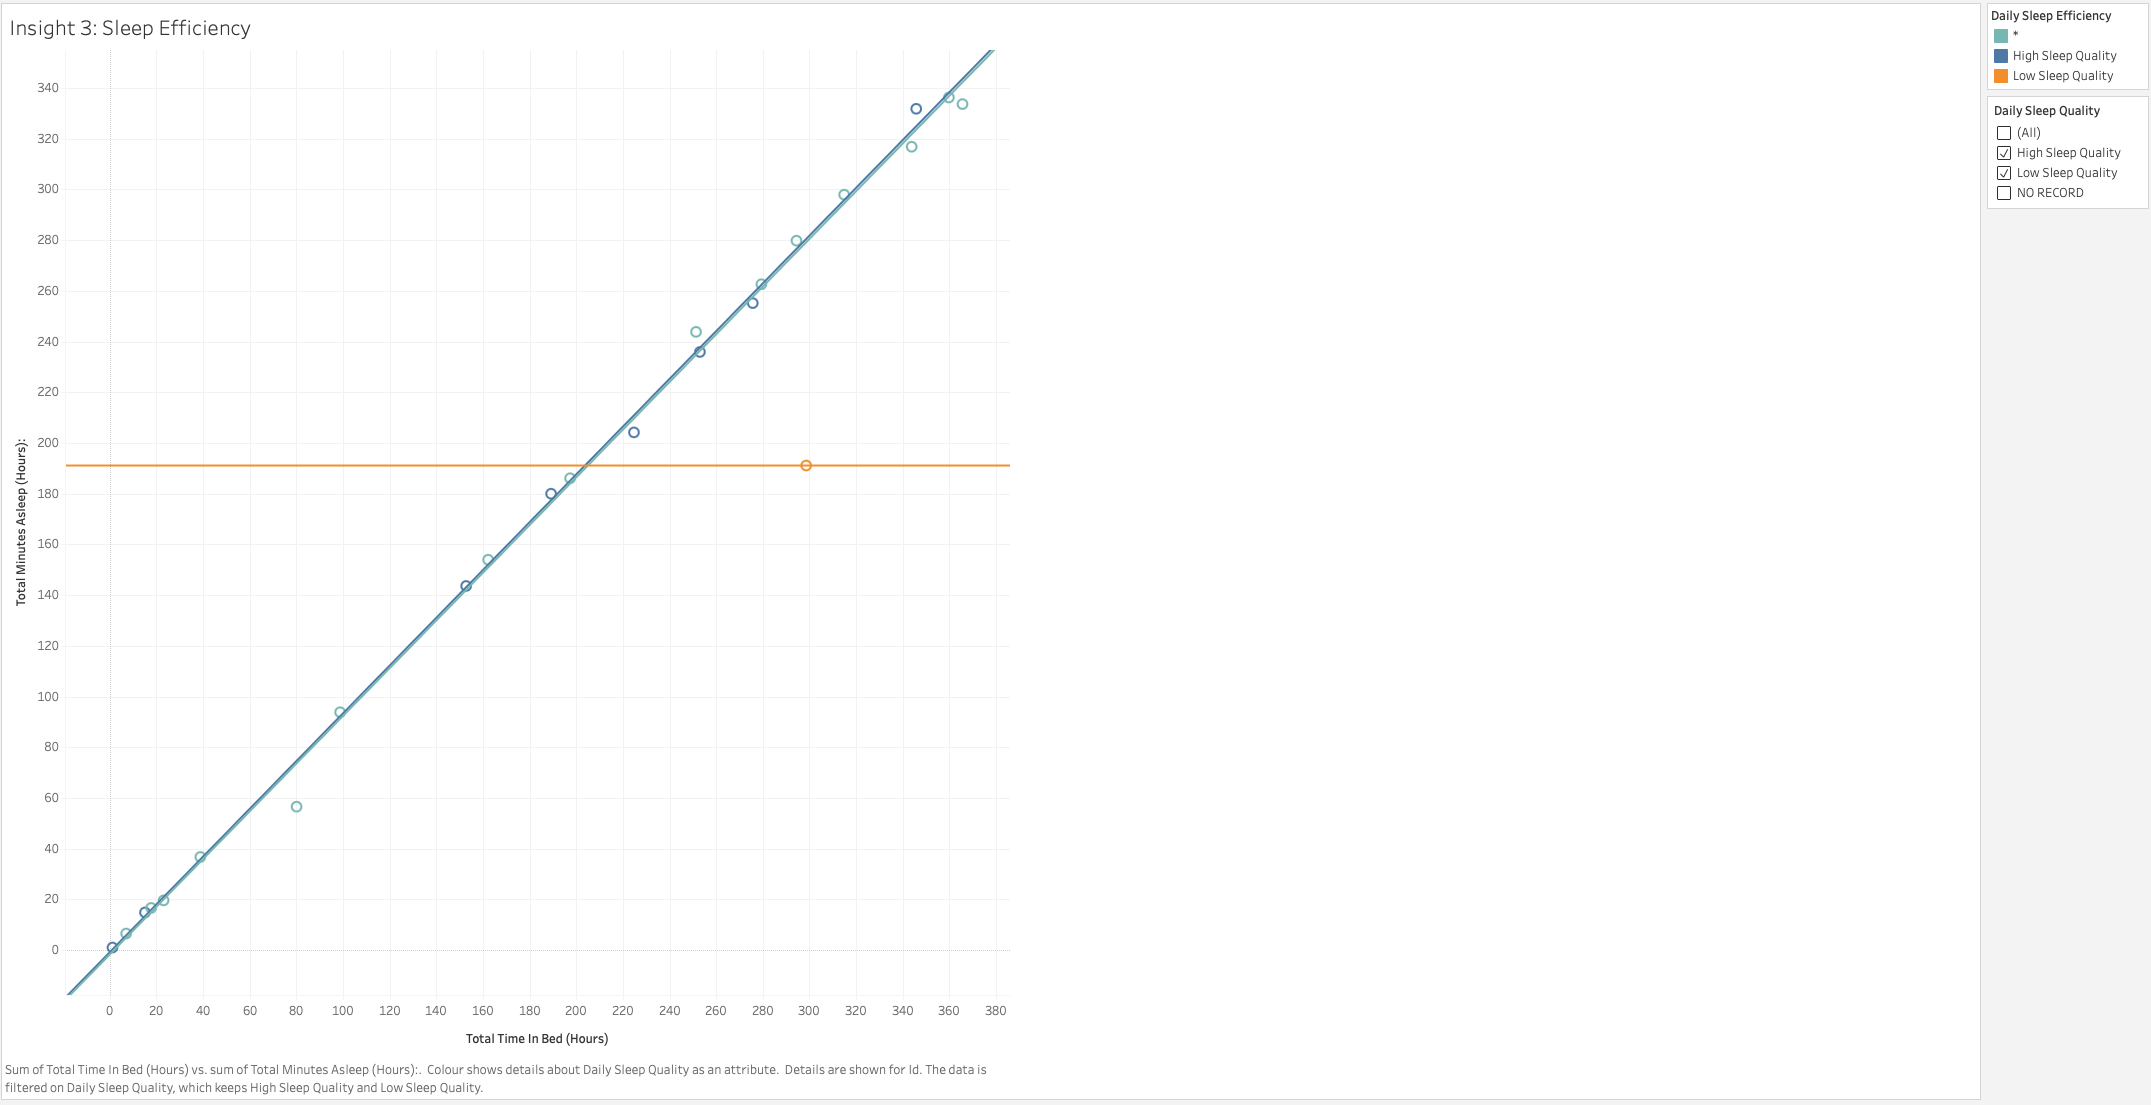

## Insight 4: Activity & Sleep Matrix

In this table, most of records those are tracked by Sleep Tracking features have High Sleep Quality. And a half of records are those with no sleep trackings, this is a blue zone for us to engage, and the target should be those in Sendentary and Moderately Active levels.

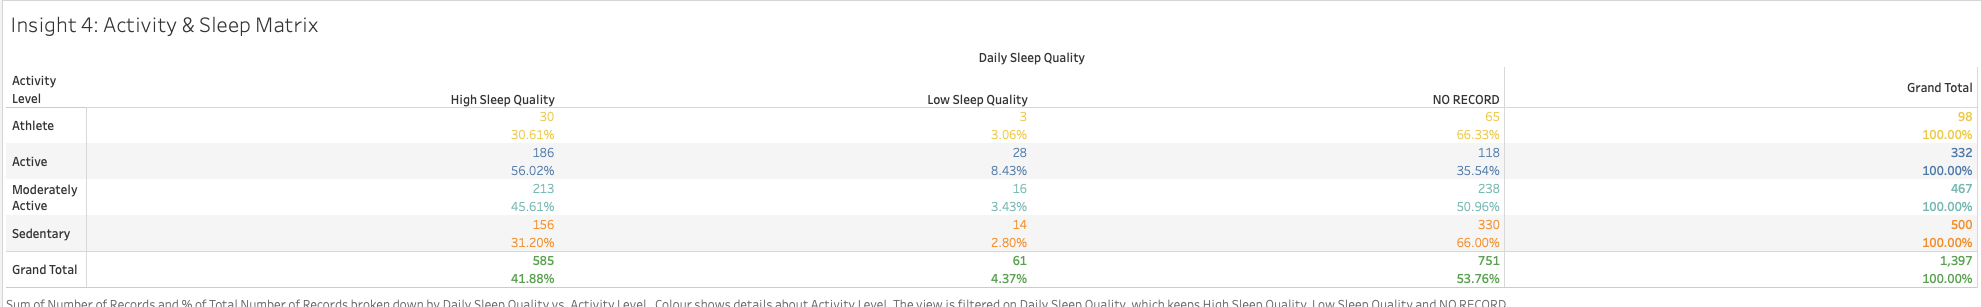
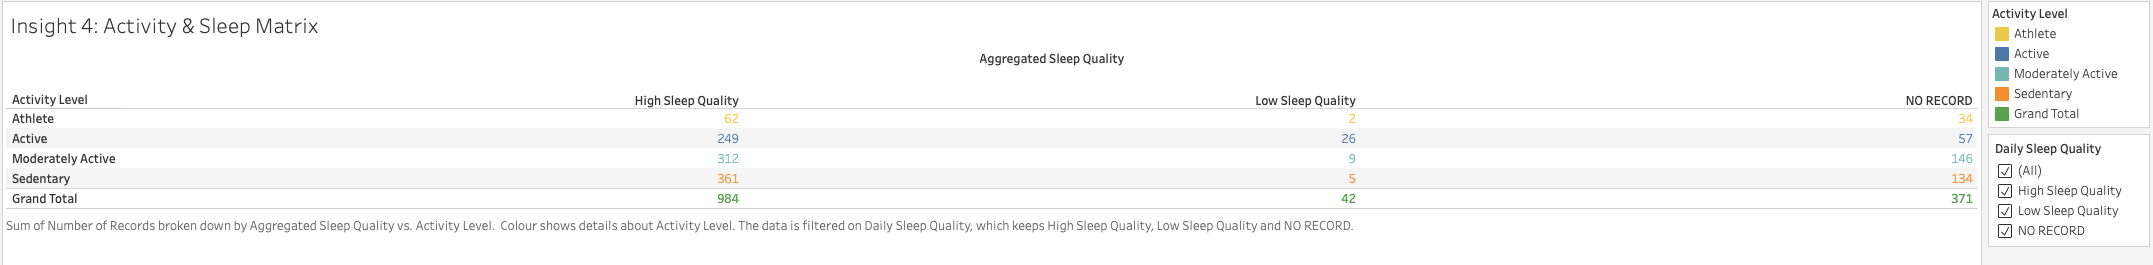
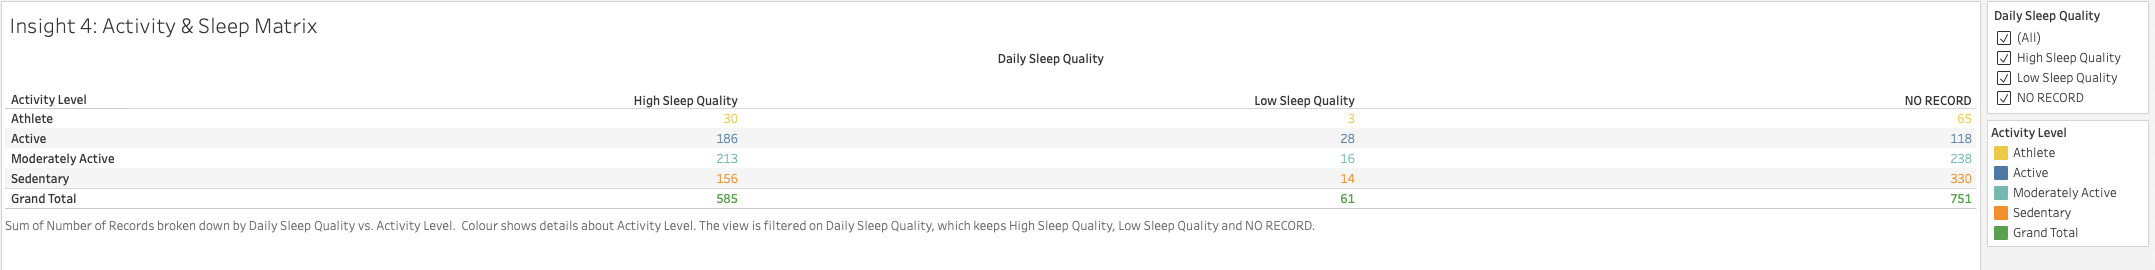
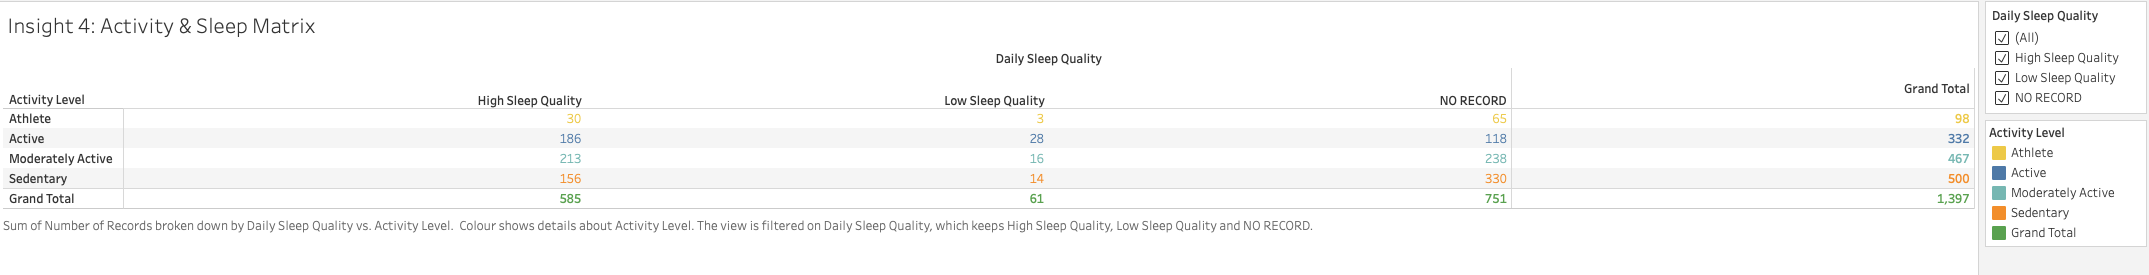

## Insight 5: Activity & Sleep Relationship

To each Activity Level, the Minutes Asleep for each one is stable. However, the Activity minutes for each one is totally different. 
- The Atheletes are those have the least sleep time and active most in every activity time frame.
- The Sedentary are those loving to sleep, they don't have time least time in activity comparing to the Moderately and Active levels.
- The Sedentary and Moderately Active are likely to spend time in Light Activity, they don't try to push themselves hard enough.

To the number of records:
- The Moderately Active users make up the largest segment.
- The Sedentary group is the second largest.
- The Athletes are your smallest group.

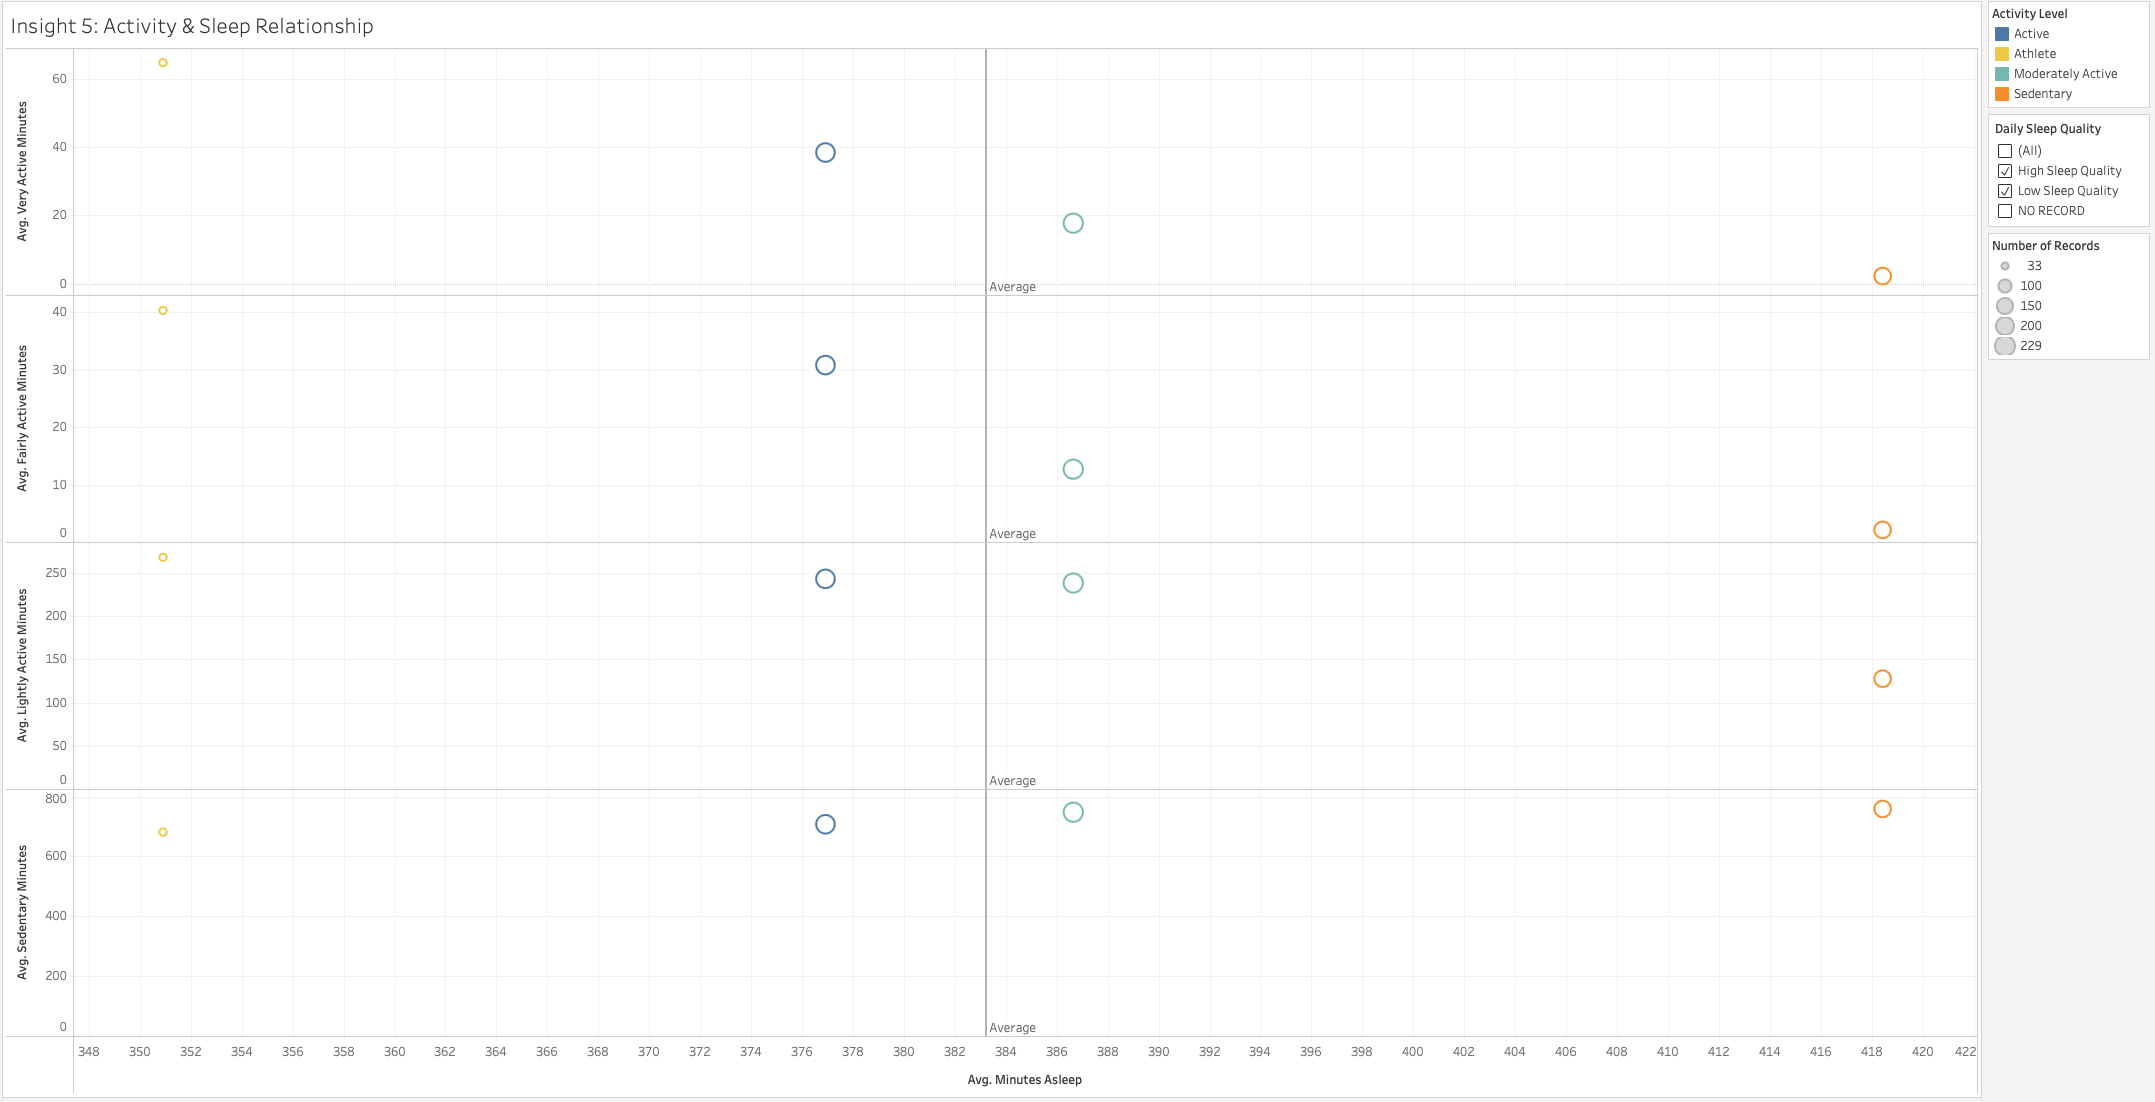

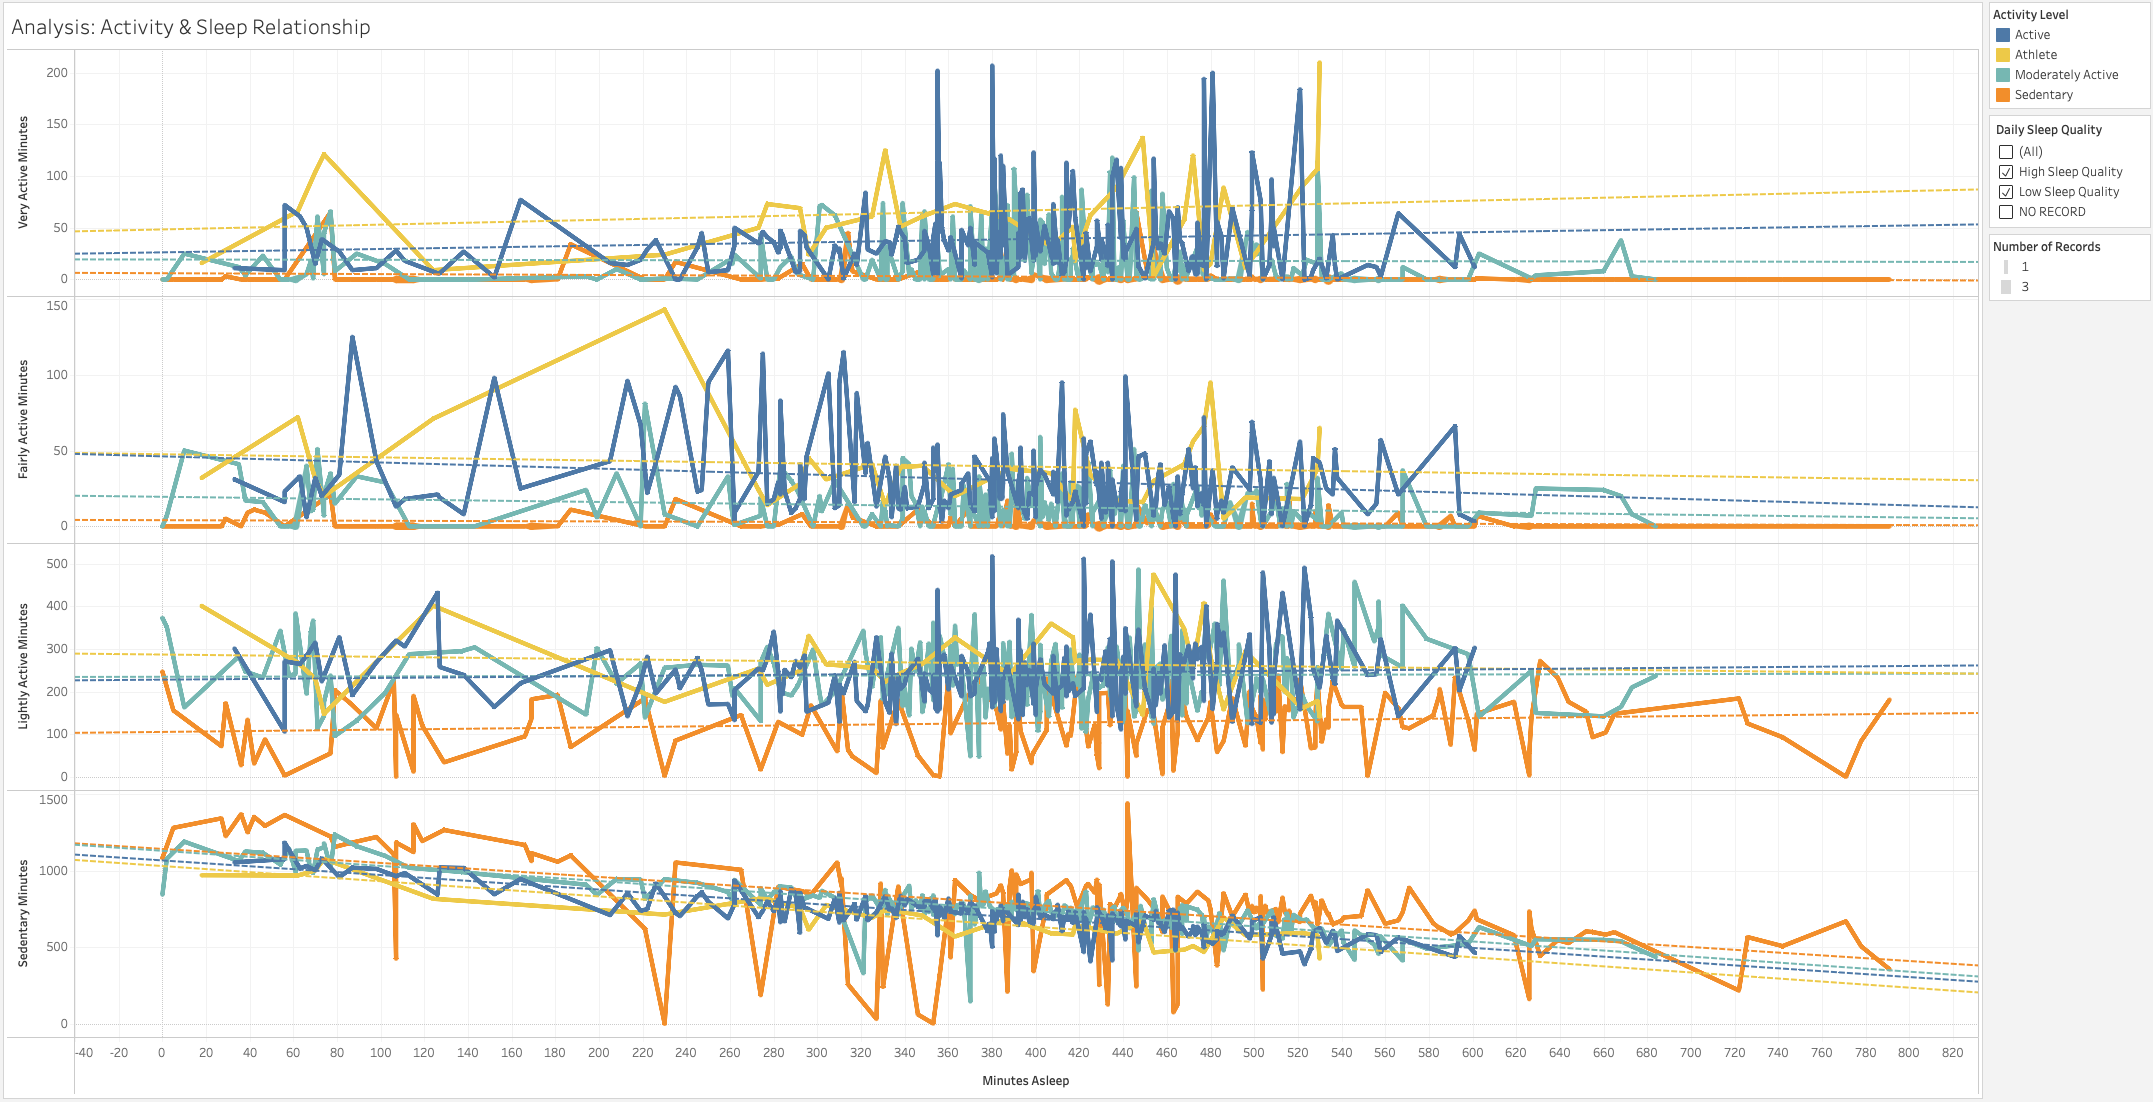
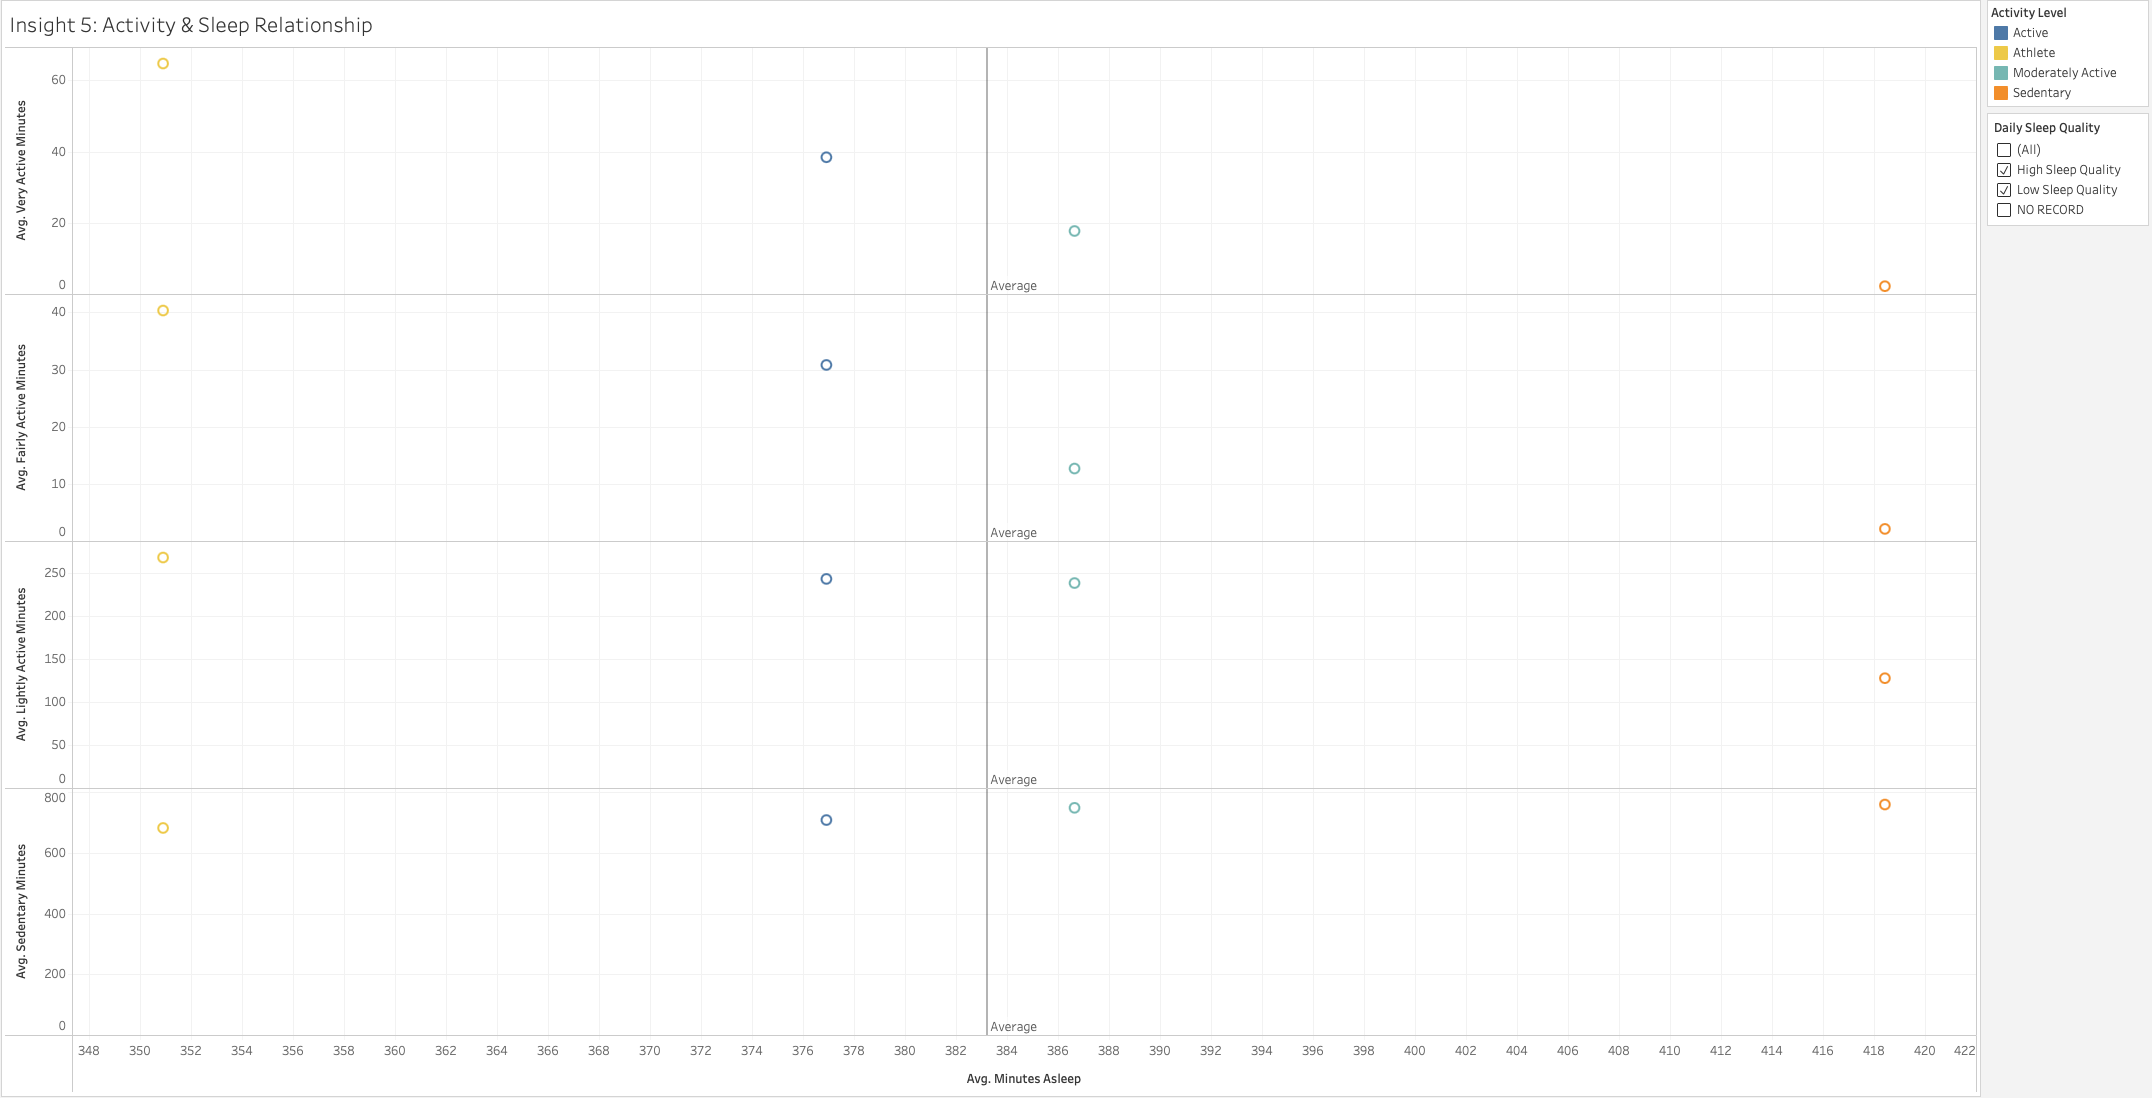

## The whole daskboard and the main outcome:

### Key User Persona:
1. The Core User: The "Moderately Active": This is the second-largest user group. They are consistently engaged with the activity tracking features and get high-quality sleep.
2. The Biggest Opportunity: The "Sedentary": This is the largest user group. They are highly inactive but, surprisingly, many who track their sleep get good sleep. The biggest finding is that most of them do not track their sleep at all.
3. The Niche: The "Athletes": This is your smallest but most disciplined user group. They are highly active, but they get the least amount of sleep on average.
4. The Cases: The best and worst cases: We have 8 cases which can become a driven to improve other performance. And a case, which had high activity level but poor sleep quality. This becomes cases for us to understand more how to improve the performance of users in the daily behaviours.

### Analytical Insights:
1. The Engagement Gap: The most critical finding is that a majority of users across all personas do not have sleep records. This points to a major issue with the sleep tracking feature's adoption, which must be addressed.
2. The Holistic Connection: Your analysis confirms that as a user's sleep duration increases, their sedentary time decreases. This strong, inverse relationship is particularly predictable for athletes, but it holds true for all user segments.


In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1755768513099' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Be&#47;Bellabeat_Practice_1&#47;Dashboard12&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Bellabeat_Practice_1&#47;Dashboard12' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Be&#47;Bellabeat_Practice_1&#47;Dashboard12&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1755768513099');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='1850px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>


# Act: Recommendation

Note1: Due to the lack of sample size and the outdated of dataset, this analysis is for the understanding of user behaviours and we have a general view of users' functions familiar.

1. **Focus on Your Core Audience**

This group of Moderately Active users is your most targeted customer base. The action here is to solidify their loyalty and leverage them for growth.
- Launch a Referral Program: Encourage these users to become brand ambassadors. Offer them a reward for every friend they refer who becomes a paid subscriber.
- Establish a Loyalty Program: Create a system that rewards them for consistent engagement. This could include badges, in-app recognition, or exclusive content for reaching specific activity or sleep milestones.
- Create Tailored Content: Develop blog posts, articles, and in-app tips that are specifically designed for their lifestyle. Focus on topics like balancing a busy schedule with exercise and optimizing rest for sustained energy.

2. **Target the Largest Opportunity**

Your Sedentary users represent a massive untapped market. The action here is to get them to adopt and consistently use the sleep tracking feature.
- In-App Onboarding & Tutorials: When a user is identified as sedentary, trigger a friendly, in-app prompt that explains the value of sleep tracking and how it can directly benefit their energy levels and well-being.
- Launch a New Marketing Campaign: Create a campaign specifically for this audience that focuses on the benefits of rest. Use messaging like "Better rest leads to more energy for your day" rather than "sleep better for a marathon."
- Simplify the Feature: Conduct user experience research to identify and remove any friction points in the sleep tracking setup. Make it as effortless as possible.

3. **Develop a Niche for Athletes**

This group, while small, is highly motivated and represents a potential market for premium features. The action here is to create a new revenue stream and solidify Bellabeat's brand as a performance tool.
- Introduce a "Pro" or "Performance" Tier: Develop a premium subscription that offers advanced features for athletes.
- Include Premium Features: This tier could include a "Recovery Score" based on sleep quality, advanced heart rate variability (HRV) analysis, and personalized routines to optimize recovery after workouts.
- Partner with Fitness Influencers: Collaborate with athletes or fitness professionals who can showcase the value of these new performance-focused features to a targeted audience.

4. **Devices:**

As observing the user behaviour, they are mostly sticking to activity only. The action here is to get them familiar with all the features of the service.
- Upgrade the devices with functions: Update the devices with high precision in every tracking. Improve the tutorials and guidance during using the devices and apps.
- Marketing the devices and samling them: Allow the users to practice with the devices, provide them with the trials so they will get familiar.
- Provide the clues about the precision: To the R&D, they should provide the clues how good the device is to tracking measurements.

5. **To have further development in this business, 3 more aspects should be considered:** Price, Community, and Branding.